# Chargement et traitement données OpenPose et Motion Capture

Les vidéos étant trop volumineuses, elles ne sont pas disponibles sur le github. Voici une capture d'écran de la vidéo après traitement OpenPose :

<div>
<img src="img\capture_ecran_video.png", width="480">
<div\>
    
On peut remarquer qu'une partie de la vidéo est floutée, le but était de cacher la deuxième personne présente sur la vidéo.

# Motion Capture
## Récupération des données

Le fichier csv nécessite une modification à la main avant d'être chargé. Voici les étapes à suivre :
* supprimer les 5 premières lignes
* supprimer la ligne mm et la colonne subframe
* remplir les cases au dessus de Y et Z avec le nom du marker

In [3]:
import pandas as pd
mocap_data = pd.read_csv("061119-NicoGabin_echangeTT_traitees.csv", sep=',', index_col=[0], header=[0,1])

In [4]:
mocap_data.head(10)

gabin-bd1                   gabin-bd2                   gabin-abd2  \
Frame         X        Y        Z         X        Y        Z          X   
2079    258.769 -1686.62  653.094   305.291 -1770.89  316.612    333.711   
2080    258.674 -1686.51  653.116   305.299 -1770.92  316.609    333.704   
2081    258.368 -1686.22  653.042   305.284 -1770.95  316.591    333.701   
2082    258.346 -1686.25  653.011   305.283 -1770.93  316.567    333.633   
2083    258.594 -1686.45  653.067   305.290 -1770.88  316.592    333.514   
2084    258.610 -1686.45  653.106   305.289 -1770.86  316.611    333.453   
2085    258.313 -1686.14  653.024   305.287 -1770.89  316.590    333.551   
2086    258.590 -1686.44  653.063   305.269 -1770.93  316.568    333.445   
2087    258.311 -1686.19  653.001   305.231 -1770.92  316.560    333.474   
2088    258.577 -1686.42  653.087   305.219 -1770.92  316.562    333.409   

                        gabin-ep2  ... nico-abd2 nico-ep2                    \
Frame        Y        Z         X  ...         Z        X        Y        Z   
2079  -1587.20  146.575  -117.858  ...   583.017  153.483  1370.13  813.535   
2080  -1587.53  146.389  -117.836  ...   576.982  154.409  1371.25  813.012   
2081  -1587.61  146.370  -117.858  ...   570.620  155.036  1371.82  812.324   
2082  -1587.38  146.421  -117.878  ...   563.840  155.720  1372.53  811.728   
2083  -1588.05  146.034  -117.874  ...   555.997  156.753  1373.47  810.966   
2084  -1588.07  146.104  -117.867  ...   548.650  157.178  1374.08  810.276   
2085  -1587.80  146.220  -117.889  ...   540.535  157.237  1374.43  809.963   
2086  -1588.25  146.014  -117.897  ...   532.484  157.443  1375.05  809.499   
2087  -1588.12  146.031  -117.930  ...   524.157      NaN      NaN      NaN   
2088  -1588.17  146.008  -117.894  ...   515.352  157.433  1375.78  808.239   

      nico-bg2                   nico-abg2                    
Frame        X        Y        Z         X        Y        Z  
2079   398.277  1412.85  547.919   516.903  1202.66  585.165  
2080   395.151  1408.80  542.220   506.019  1194.05  576.008  
2081   390.323  1403.84  535.215   493.751  1184.92  566.120  
2082   385.781  1399.22  529.388   479.754  1175.59  555.877  
2083   378.844  1393.14  521.584   463.275  1165.75  544.653  
2084   371.799  1387.40  514.212   444.814  1155.78  533.025  
2085   363.674  1381.42  506.688   424.204  1145.82  521.054  
2086   354.418  1375.25  498.881   401.525  1136.05  508.930  
2087   344.029  1368.99  490.959   376.930  1126.67  496.862  
2088   332.215  1362.40  482.607   350.639  1117.88  485.074  

[10 rows x 75 columns]

## Tracés de la position
### Un marqueur en 3D

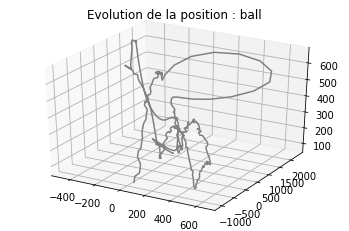

In [5]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt

def ev_3D_marker_mocap(data,seg,start=0,end=-1):
    "fonction qui trace en 3D l'évolution de la position du marqueur seg. start est la frame de départ et end la frame de fin"
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x=data.iloc[start:end][seg]['X'].tolist()
    y=data.iloc[start:end][seg]['Y'].tolist()
    z=data.iloc[start:end][seg]['Z'].tolist()

    ax.plot3D(x, y, z, 'gray')
    plt.title('Evolution de la position : '+seg)
    plt.show()
    
ev_3D_marker_mocap(mocap_data,'ball')

### Evolution des coordonnées
On peut afficher l'évolution des différentes coordonnées de chaque marqueur. Ceci est notamment utile pour repérer la frame à laquelle nous avons fait un clap.

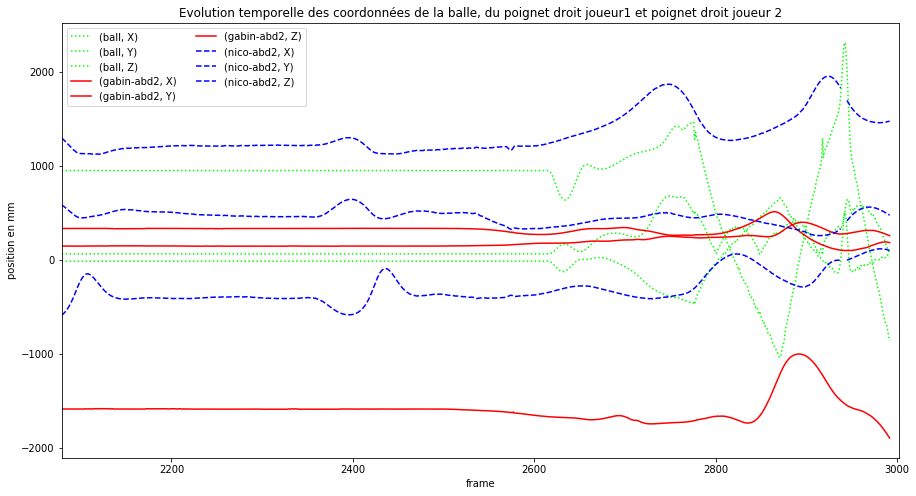

In [46]:
%matplotlib inline
def dataframe_plot(data,segments='all',start=0,end=-1,title='Evolution temporelle',xlabel='frame',ylabel=None):
    fig, ax = plt.subplots()
    if segments=='all':
        data.iloc[start:end].plot(figsize=(15,8),ax=ax)
    else :
        data.iloc[start:end].plot(y=['ball'],figsize=(15,8),ax=ax,style=':',c=(0,1.0,0))
        data.iloc[start:end].plot(y=['gabin-abd2'],figsize=(15,8),ax=ax,style='-',c=(1.0,0,0))
        data.iloc[start:end].plot(y=['nico-abd2'],figsize=(15,8),ax=ax,style='--',c=(0,0,1.0))
    ax.legend(ncol=2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    
dataframe_plot(mocap_data,segments=['ball','gabin-abd2','nico-abd2'],ylabel='position en mm',title='Evolution temporelle des coordonnées de la balle, du poignet droit joueur1 et poignet droit joueur 2')

### Animation 3D Motion Capture

In [11]:
import numpy as np
import matplotlib
matplotlib.rcParams['animation.ffmpeg_path'] = r'ffmpeg.exe'
from mpl_toolkits.mplot3d import Axes3D
matplotlib.use("Agg")
import matplotlib.animation as animation
import pandas as pd
from IPython.display import HTML
#%matplotlib notebook
#%matplotlib notebook

#segments=df.columns.get_level_values(level=0).unique()
segments=['ball']

def update_graph(num):
    X,Y,Z=[],[],[]
    for seg in segments:
        data=mocap_data[seg].iloc[num]
        X.append(data.X)
        Y.append(data.Y)
        Z.append(data.Z)
    graph.set_data(X, Y)
    graph.set_3d_properties(Z)
    title.set_text('3D Test, time={}'.format(num))
    return title, graph, 


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('3D Test')
#ax.xlim=(df['Nico1:abd2']['X'].min(),df['Nico1:abd2']['X'].max())

X,Y,Z=[],[],[]
num=0
for seg in segments:
    data=mocap_data[seg].iloc[num]
    X.append(data.X)
    Y.append(data.Y)
    Z.append(data.Z)
graph, = ax.plot(X, Y, Z, linestyle="-", marker="o")

ani = animation.FuncAnimation(fig, update_graph, 
                               interval=10, blit=True, repeat=False, save_count=len(mocap_data)) #save_count=len(mocap_data) if you want to save all the animation

ax.set_xlim(-600,600)
ax.set_ylim(-1500,2500)
ax.set_zlim(-600,600)
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=100, metadata=dict(artist='Me'), bitrate=1800)
#ani.save('videos/MoCap_animation.mp4', writer=writer)
#plt.show()

HTML(ani.to_html5_video())

## Evolution de la vitesse
### Série temporelle

In [22]:
import numpy as np
def derivee(df,fps):
    "renvoie un dataframe contenant la dérivée projetée sur x,y,z pour chaque segment"
    df2=(df.shift(1)-df)*fps
    df2=df2.fillna(0)
    return df2

def apply_norm(row,header):
    coord=row.index.get_level_values(1).unique()
    norm=0
    for c in coord:
        norm+=row[header][c]**2
    return(np.sqrt(norm))

def norm_dataframe(df):
    "renvoie un dataframe avec la norme des colonnes x,y,z."
    headers=df.columns.get_level_values(level=0).unique()
    df2=pd.DataFrame(columns=headers)
    for header in headers:
        df2[header]=df.apply(apply_norm,header=header,axis=1)
    return(df2)
    

mocap_coord_v=derivee(mocap_data,100)
mocap_v=norm_dataframe(mocap_coord_v)

Traceback (most recent call last):
  File "C:\Users\ReViVD\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 215, in process
    func(*args, **kwargs)
  File "C:\Users\ReViVD\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


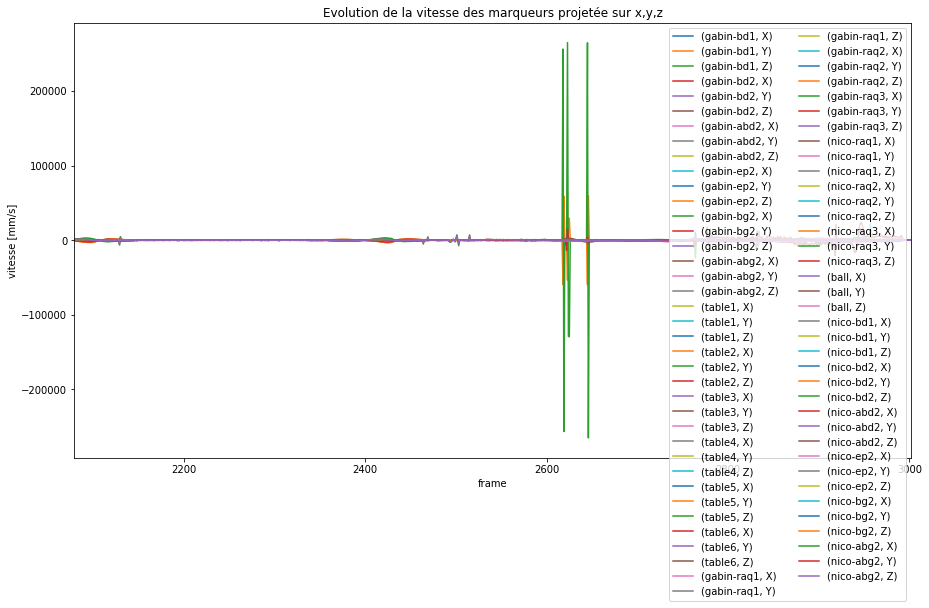

In [14]:
%matplotlib inline
dataframe_plot(mocap_coord_v,ylabel='vitesse [mm/s]',title='Evolution de la vitesse des marqueurs projetée sur x,y,z')

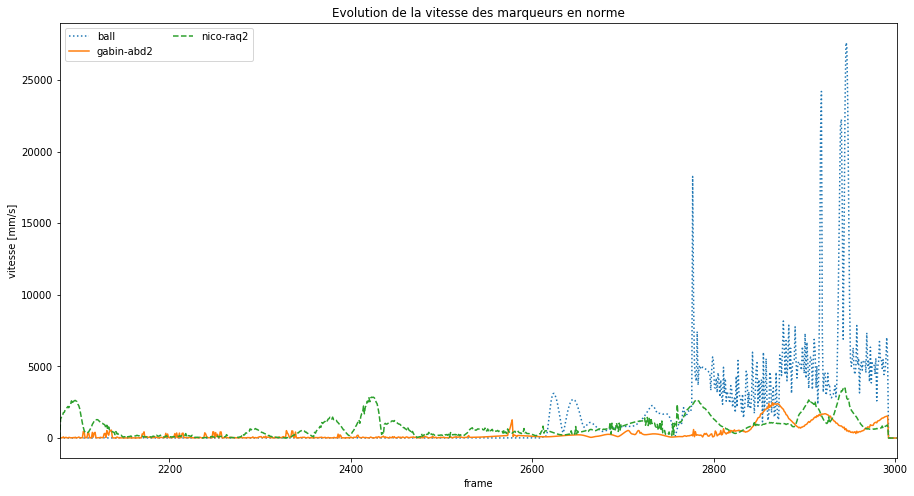

In [24]:
%matplotlib inline
dataframe_plot(mocap_v,ylabel='vitesse [mm/s]',title='Evolution de la vitesse des marqueurs en norme',segments=['ball','gabin-abd2','nico-raq2'])

## Evolution de l'accélération

### Série temporelle

In [35]:
mocap_coord_acc=derivee(mocap_coord_v,100)
mocap_acc=norm_dataframe(mocap_coord_acc)

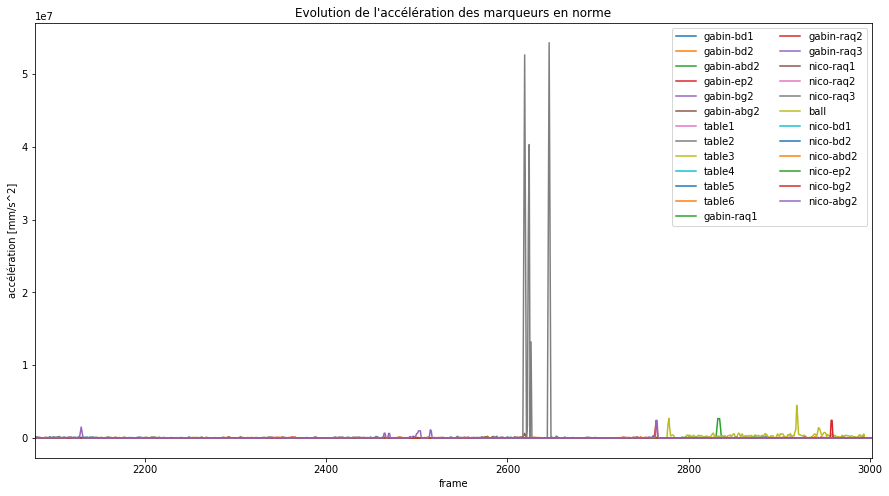

In [36]:
%matplotlib inline
dataframe_plot(mocap_acc,ylabel='accélération [mm/s^2]',title="Evolution de l'accélération des marqueurs en norme")

# Tracking OpenPose

Sur le github d'OpenPose, on trouve à quoi corresponde les coordonnées présentes dans le json [link](https://github.com/CMU-Perceptual-Computing-Lab/openpose/blob/master/doc/output.md). Il existe deux configurations Body_25 et COCO données par les images ci-dessous. 

<table>
		<tr>
			<td><img src="img\keypoints_pose_25.png", width="480"></td>
			<td><img src="img\keypoints_pose_18.png", width="480"></td>
		</tr>
</table>

Dans le cas "Body_25" les parties du corps sont les suivantes (pour COCO il suffit d'identifier les numéros communs avec Body_25) : 

In [11]:
# Resultat pour BODY_25 (25 parties du corps composées de COCO + pied)
#     {0,  "Nose"},
#     {1,  "Neck"},
#     {2,  "RShoulder"},
#     {3,  "RElbow"},
#     {4,  "RWrist"},
#     {5,  "LShoulder"},
#     {6,  "LElbow"},
#     {7,  "LWrist"},
#     {8,  "MidHip"},
#     {9,  "RHip"},
#     {10, "RKnee"},
#     {11, "RAnkle"},
#     {12, "LHip"},
#     {13, "LKnee"},
#     {14, "LAnkle"},
#     {15, "REye"},
#     {16, "LEye"},
#     {17, "REar"},
#     {18, "LEar"},
#     {19, "LBigToe"},
#     {20, "LSmallToe"},
#     {21, "LHeel"},
#     {22, "RBigToe"},
#     {23, "RSmallToe"},
#     {24, "RHeel"},
#     {25, "Background"}

## Récupération des données

In [12]:
import json
import os

def get_openpose_data(model):
    "model should be BODY_25 or COCO"
    os.chdir(r"C:\Users\ReViVD\Desktop\MultiAcqui\211019_NicoGabin_carre\OpenPose_skellington_capture\brutes")

    data=[]
    for jsonfile in os.listdir():
        if 'json' in jsonfile:
            with open(jsonfile) as j:
                people=json.loads(j.read())['people'][0]['pose_keypoints_2d']
                data.append(people)
    
    if model=='BODY_25':    
        iterables=[["Nose","Neck","RShoulder","RElbow","RWrist","LShoulder","LElbow","LWrist","MidHip","RHip","RKnee","RAnkle","LHip","LKnee","LAnkle","REye","LEye","REar","LEar","LBigToe","LSmallToe","LHeel","RBigToe","RSmallToe","RHeel","Background"],['x','y','c']]
    if model=='COCO':
        iterables=[["Nose","Neck","RShoulder","RElbow","RWrist","LShoulder","LElbow","LWrist","RHip","RKnee","RAnkle","LHip","LKnee","LAnkle","REye","LEye","REar","LEar"],['x','y','c']]
    columns=pd.MultiIndex.from_product(iterables, names=['first', 'second'])
    data=pd.DataFrame(data, columns=columns)

    os.chdir(r"C:\Users\ReViVD\Desktop\MultiAcqui\211019_NicoGabin_carre")
    return(data)

op_data=get_openpose_data('COCO')

In [13]:
op_data.head(10)

first      Nose                        Neck                    RShoulder  \
second        x        y         c        x        y         c         x   
0       860.042  412.618  0.448002  918.783  471.390  0.731785   930.653   
1       860.044  412.579  0.444097  918.768  471.431  0.738546   930.657   
2       860.037  412.587  0.435449  918.797  471.418  0.739221   930.676   
3       860.030  412.585  0.426685  918.787  471.413  0.736477   930.659   
4       860.032  412.585  0.444124  918.787  471.410  0.736323   930.664   
5       860.037  412.578  0.436364  918.772  471.416  0.735953   930.650   
6       860.036  412.585  0.419157  918.765  471.409  0.735459   930.637   
7       860.037  412.573  0.388632  918.768  471.419  0.738599   930.648   
8       860.034  412.594  0.359602  918.772  471.438  0.741690   930.672   
9       860.052  412.594  0.339810  918.775  471.425  0.743335   930.673   

first                       RElbow  ... REye     LEye                     \
second        y         c        x  ...    c        x        y         c   
0       465.599  0.724622  924.626  ...  0.0  862.861  403.762  0.531664   
1       468.437  0.726488  921.743  ...  0.0  862.874  403.718  0.522167   
2       465.600  0.725938  921.735  ...  0.0  862.865  403.723  0.512956   
3       465.594  0.726915  924.543  ...  0.0  862.862  403.717  0.505367   
4       465.598  0.725548  924.536  ...  0.0  862.870  403.728  0.521213   
5       465.605  0.725731  924.542  ...  0.0  862.873  403.707  0.511349   
6       465.594  0.726233  924.532  ...  0.0  862.863  403.716  0.498386   
7       465.602  0.727744  924.550  ...  0.0  862.857  403.706  0.471602   
8       468.426  0.728404  924.585  ...  0.0  862.846  403.716  0.445733   
9       465.603  0.729440  924.542  ...  0.0  862.856  403.724  0.431409   

first      REar                        LEar                     
second        x        y         c        x        y         c  
0       924.601  409.658  0.055200  883.362  406.607  0.938269  
1       924.592  409.675  0.056653  883.371  406.590  0.935910  
2       924.601  409.653  0.057283  883.359  406.579  0.933608  
3       924.582  409.635  0.061108  883.344  406.579  0.932502  
4       924.620  409.652  0.058610  883.357  406.599  0.937572  
5       924.610  409.647  0.060049  883.355  406.574  0.934714  
6       924.592  409.649  0.062725  883.343  406.576  0.935824  
7       924.556  409.641  0.069531  880.651  406.567  0.933179  
8       921.797  409.584  0.075649  880.625  406.549  0.928079  
9       921.775  409.586  0.077632  880.625  406.559  0.930273  

[10 rows x 54 columns]

## Tracés de la position
### Evolution des coordonnées

Notons que les coordonnées renvoyées par OpenPose sont calculées pour une origine placée en haut à gauche de l'écran.

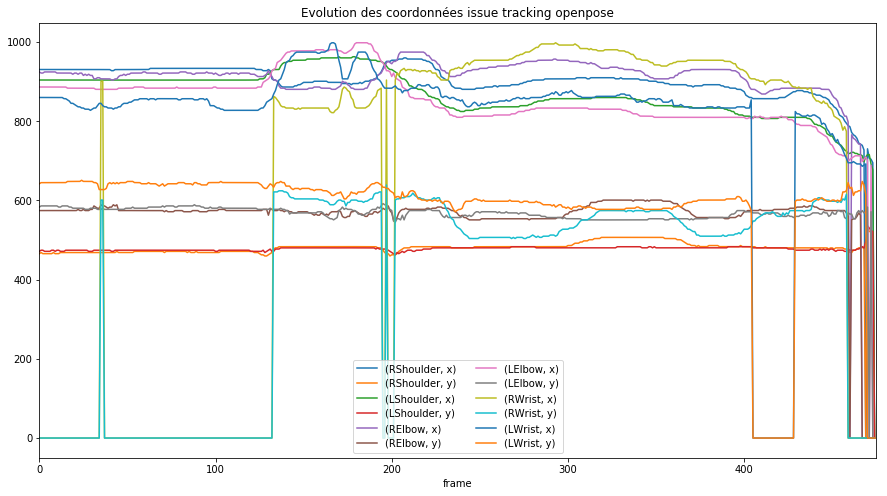

In [14]:
%matplotlib inline
mocap_segments=['RShoulder','LShoulder',"RElbow","LElbow","RWrist","LWrist"] #only same parts as MoCap

op_data = op_data.sort_index(axis=1)
op_data_without_c=op_data.loc[:,(slice(None),('x','y'))].copy() #we don't want to plot c 

dataframe_plot(op_data_without_c,title='Evolution des coordonnées issue tracking openpose',segments=mocap_segments)

### Animation 2D 

<IPython.core.display.Javascript object>


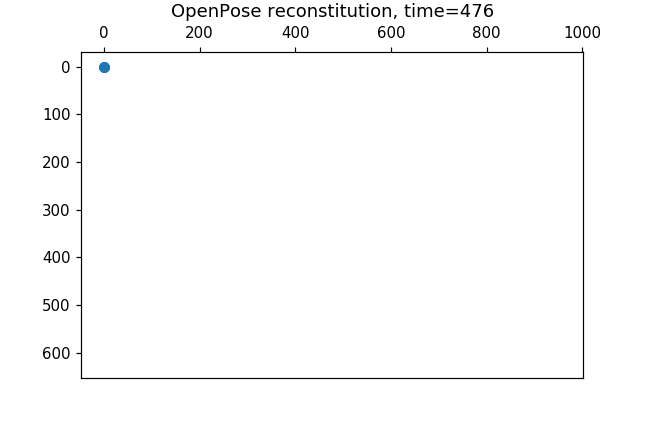

In [60]:
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt

segments=["LWrist","LElbow",'LShoulder','RShoulder',"RElbow","RWrist"]
def update_graph(num):
    X,Y=[],[]
    for seg in segments:
        data=op_data_without_c[seg].iloc[num]
        X.append(data.x)
        Y.append(data.y)
    graph.set_data(X, Y)
    title.set_text('OpenPose reconstitution, time={}'.format(num))
    return title, graph, 


fig = plt.figure()
ax = fig.add_subplot(111)
title = ax.set_title('OpenPose reconstitution')
#ax.xlim=(df['Nico1:abd2']['X'].min(),df['Nico1:abd2']['X'].max())

X,Y=[],[]
num=200
for seg in segments:
    data=op_data_without_c[seg].iloc[num]
    X.append(data.x)
    Y.append(data.y)
graph, = ax.plot(X, Y, linestyle="-", marker="o")

ani = animation.FuncAnimation(fig, update_graph, 
                               interval=40, blit=True, repeat=False) #save_count=len(op_data2)

ax.set_xlim(0,2000)
ax.set_ylim(0,2000)

#origine en haut à gauche de l'écran
ax.set_ylim(ax.get_ylim()[::-1])
ax.yaxis.tick_left()
ax.xaxis.tick_top() 

#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=25, metadata=dict(artist='Me'), bitrate=1800)
#ani.save('videos/OpenPose_animation.mp4', writer=writer)
plt.show()


Pour chaque keypoint, on a les valeurs de position x,y et la valeur de confiance c comprise entre 0 et 1. On remarque que certaines valeurs de x,y sont 0 : il s'agit des instants où le point n'est pas détecté par OpenPose.

## Evolution de la vitesse
### Série temporelle

In [15]:
fps_op=int(input('Enter op fps value:'))
op_coord_v=derivee(op_data_without_c,fps_op)
op_v=norm_dataframe(op_coord_v)

Enter op fps value:25


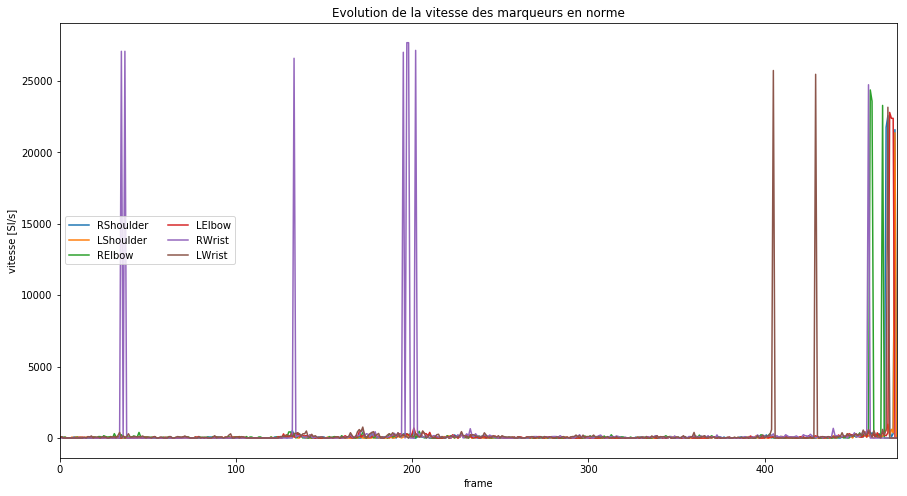

In [16]:
%matplotlib inline
dataframe_plot(op_v,ylabel='vitesse [SI/s]',title='Evolution de la vitesse des marqueurs en norme',segments=mocap_segments)

## Evolution de l'accélération
### Série temporelle

In [34]:
op_coord_acc=derivee(op_coord_v,25)
op_acc=norm_dataframe(op_coord_acc)

NameError: name 'op_coord_v' is not defined

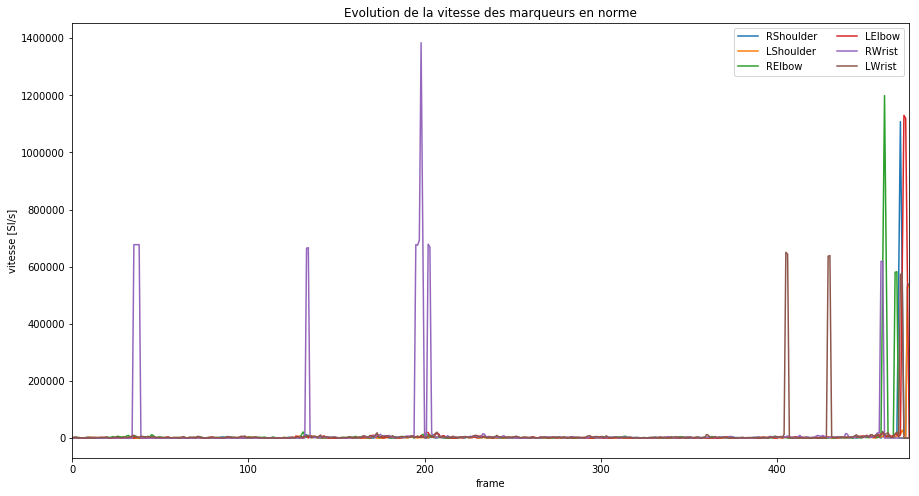

In [18]:
%matplotlib inline
dataframe_plot(op_acc,ylabel='vitesse [SI/s]',title='Evolution de la vitesse des marqueurs en norme',segments=mocap_segments)

## Nettoyage des données OpenPose

On a pu voir, en traçant l'évolution des coordonnées, que lorsqu'un point n'est pas visible par la caméra OpenPose lui associe le point 0,0. On va essayer de gérer ces erreurs autrement.

### Lissage des données
Premièrement on peut faire un lissage des données (on prend un lissage d'ordre 5) :

In [19]:
op_data_liss=op_data_without_c.rolling(5).mean()

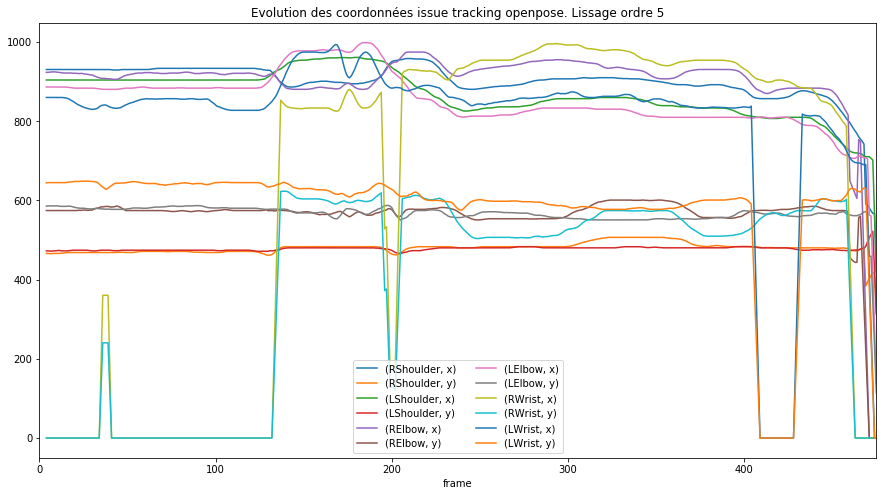

In [20]:
dataframe_plot(op_data_liss,title='Evolution des coordonnées issue tracking openpose. Lissage ordre 5',segments=mocap_segments)

Le problème d'un lissage classique est que lorsque le marqueur disparaît trop longtemps, on reste quand même à la valeur 0 pour certaines coordonnées. De plus, ce lissage fausse les autres valeurs.

### Lissage seulement pour les valeurs 0

L'idée est de prendre toutes les valeurs à 0 et de les remplacer par la moyenne des n valeurs précédentes non nulles et n valeurs suivantes non nulles (n à déterminer).

In [84]:
def only_0_lissage(df):
    df2=df.copy()
    columns=df.columns
    for col in range(len(columns)):
        index_0=np.where(df[columns[col]]==0)[0] # get indices where x or y =0
        i=0
        j=0
        while j<(len(index_0)-1): 
            while j<(len(index_0)-1) and ((index_0[j+1]-index_0[j])<2): # tant que x et y sont à 0 successivement
                j+=1
            if index_0[i]==0: #si dès le début un segment n'est pas détecté on lui attribue la première valeur qu'on a
                if index_0[j]==len(df2)-1:
                    df2.iloc[index_0[i]:index_0[j]+1,col]=0 # on ne peut rien changer
                else:
                    df2.iloc[index_0[i]:index_0[j]+1,col]=df2.iloc[index_0[j]+1,col]
            else:
                if index_0[j]==len(df2)-1:
                    df2.iloc[index_0[i]:index_0[j]+1,col]=(df2.iloc[index_0[j],col]+df2.iloc[index_0[i]-1,col])/2
                else:
                    df2.iloc[index_0[i]:index_0[j]+1,col]=(df2.iloc[index_0[j]+1,col]+df2.iloc[index_0[i]-1,col])/2
            j+=1
            i=j
    
    return df2
                
op_data_holes_liss=only_0_lissage(op_data_without_c)

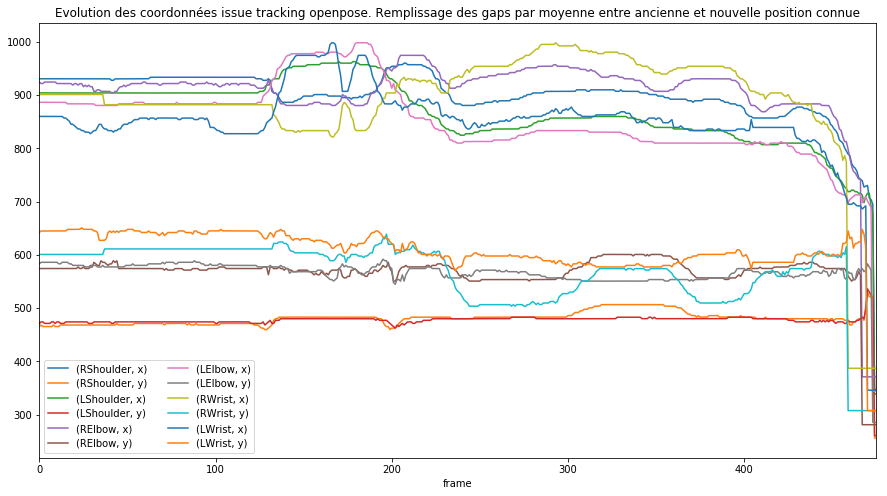

In [86]:
dataframe_plot(op_data_holes_liss,title='Evolution des coordonnées issue tracking openpose. Remplissage des gaps par moyenne entre ancienne et nouvelle position connue',segments=mocap_segments)

Voyons comment l'animation est rendue suite à ce remplissage de gaps.

# Lissage des données MoCap
On a pu voir (notamment pour la vitesse et l'accélération) que certaines valeurs pouvaient être trop élevées et tromper la visualisation. On peut résoudre ce problème grâce à un lissage :

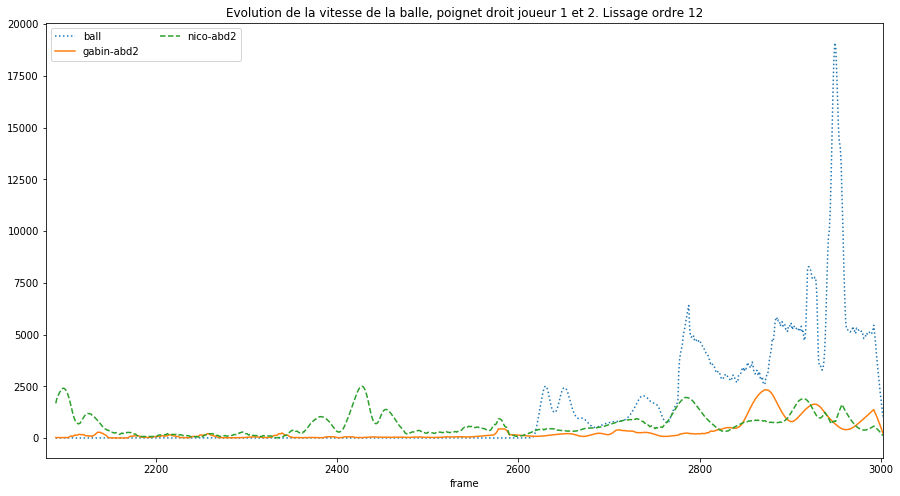

In [33]:
mocap_v_liss=mocap_v.rolling(12).mean()
dataframe_plot(mocap_v_liss,title='Evolution de la vitesse de la balle, poignet droit joueur 1 et 2. Lissage ordre 12',segments=['ball','gabin-abd2','nico-abd2'])

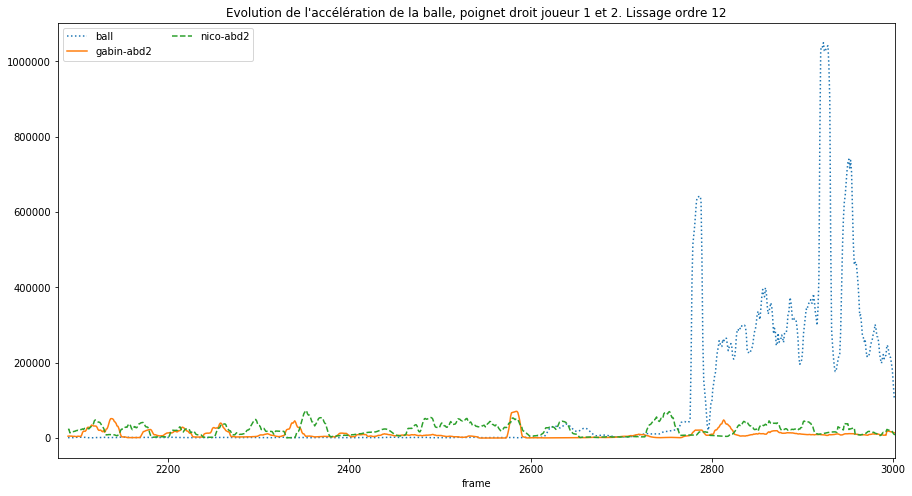

In [38]:
mocap_acc_liss=mocap_acc.rolling(12).mean()
dataframe_plot(mocap_acc_liss,title="Evolution de l'accélération de la balle, poignet droit joueur 1 et 2. Lissage ordre 12",segments=['ball','gabin-abd2','nico-abd2'])

# Synchronisation

## Synchronisation spatiale

### Projection 2D 

Pour passer d'un repère 3D à un repère 2D on a besoin de 8 valeurs de projection :
* (xx, xy, xz) : pour convertir un point en ordinnées
* (yx, yy, yz) : pour convertir un point en abscices
* (ox, oy) : les offsets entre les origines

Si (X, Y, Z) sont nos coordonnées 3D d'origine, alors on obtien les coordonnées projetées (X2d, Y2d) par :

X2d = X*xx + Y*xy + Z*xz + ox

Y2d = X*yx + Y*yy + Z*yz + oy

Avec un peu de ML on trouve ([lien](https://github.com/AmigoCap/MultiAcqui/tree/master/3Dto2D_conversion)) :

**Projection Matrix** : 
$
\begin{matrix} 
0.05241897 & -0.13417533 & -0.00497104 \\
-0.00236236 &  0.00797051 & -0.25118345
\end{matrix}
$

**Offset Matrix** : 
$
\begin{matrix} 
1031.45356893 \\
855.62283821
\end{matrix}
$


In [23]:
x_proj=np.array([0.05241897,-0.13417533,-0.00497104])
y_proj=np.array([-0.00236236,0.00797051,-0.25118345])
offset=[1031.45356893,855.62283821]

def projection(row,header,proj,offset):
    return (np.vdot(np.array(row[header]),proj)+offset)

def projection_mocap_2D(df):
    headers=df.columns.get_level_values(level=0).unique()
    df2=df.loc[:,(slice(None),('X','Y'))].copy()
    for header in headers:
        for abscisse in ['X','Y']:
            if abscisse=='X':
                df2.loc[:,(header,'X')]=df.apply(projection,header=header,proj=x_proj,offset=offset[0],axis=1)
            else :
                df2.loc[:,(header,'Y')]=df.apply(projection,header=header,proj=y_proj,offset=offset[1],axis=1)
                
    return(df2)

mocap_data_2D=projection_mocap_2D(mocap_data)

## Synchronisation temporelle

De manière visuelle, sur les graphiques précédents, il semblerait que la frame du clap soit 172 pour la vidéo et 557 pour le Mocap

In [25]:
fps_mocap=int(input('Enter mocap fps value:'))
fps_op=int(input('Enter op fps value:'))

def sync_op_mocap(df1,df2,frame1,frame2,fps1,fps2):
    df1_sync=df1.copy()
    times=df1_sync.index/fps1
    df1_sync['times']=times
    
    df2_sync=df2.copy()
    times=df2_sync.index/fps2
    df2_sync['times']=times
    df1_sync['times']=(df1_sync['times']-frame1/fps1)
    df2_sync['times']=(df2_sync['times']-frame2/fps2)
    return df1_sync,df2_sync

mocap_data_2D_sync,op_data_sync=sync_op_mocap(mocap_data_2D,op_data_without_c,557,172,fps_mocap,fps_op)

Enter mocap fps value:100
Enter op fps value:25


# Comparaison

In [26]:
def two_dataframes_plot(df1,df2,segments1='all',segments2='all',start1=0,end1=-1,start2=0,end2=-1,title='Comparaison évolutions temporelles',xlabel='time [s]',ylabel=None):
    fig, ax = plt.subplots()
    if xlabel=='time [s]':
        if segments1=='all':
            df1.iloc[start1:end1].plot(x='times',figsize=(15,10),ax=ax)
        else :
            df1.iloc[start1:end1].plot(x='times',y=segments1,figsize=(15,10),ax=ax)

        if segments2=='all':
            df2.iloc[start2:end2].plot(x='times',figsize=(15,10),ax=ax)
        else :
            df2.iloc[start2:end2].plot(x='times',y=segments2,figsize=(15,10),ax=ax)
    
    if xlabel=='frame':
        if segments1=='all':
            df1.iloc[start1:end1].plot(figsize=(15,10),ax=ax)
        else :
            df1.iloc[start1:end1].plot(y=segments1,figsize=(15,10),ax=ax)

        if segments2=='all':
            df2.iloc[start2:end2].plot(figsize=(15,10),ax=ax)
        else :
            df2.iloc[start2:end2].plot(y=segments2,figsize=(15,10),ax=ax)
        
    ax.legend(ncol=2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

## Positions

### Coordonnées globales

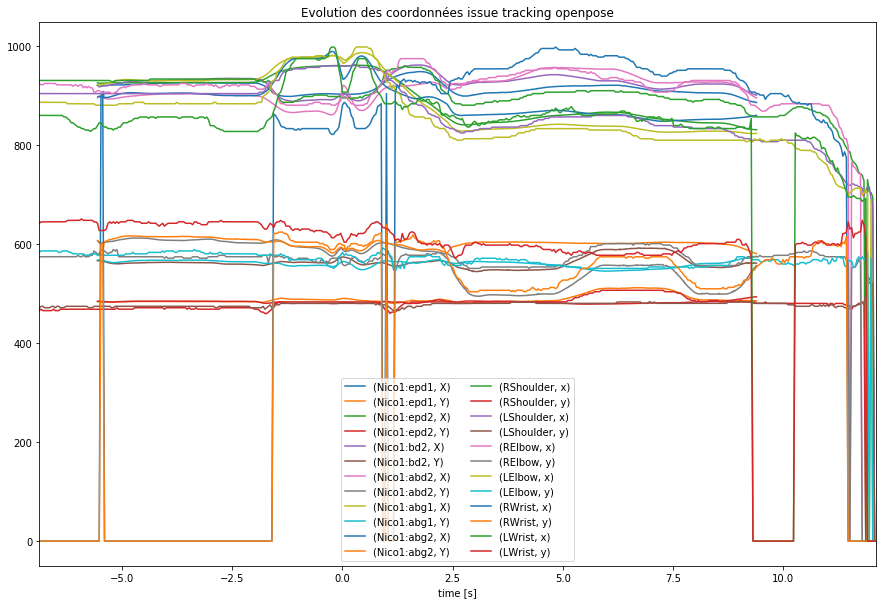

In [27]:
two_dataframes_plot(mocap_data_2D_sync,op_data_sync,segments2=mocap_segments,title='Evolution des coordonnées issue tracking openpose')

### Coordonnée du poignet droit

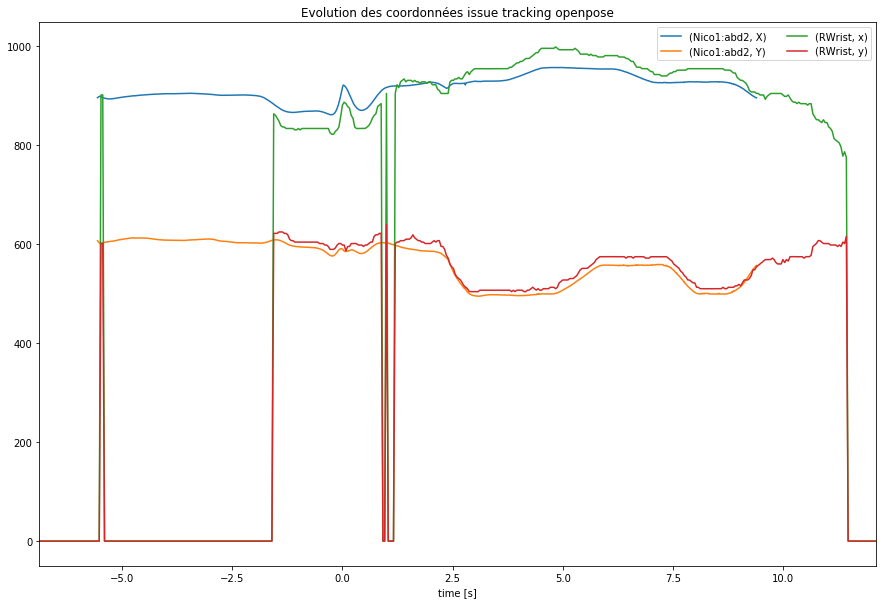

In [28]:
two_dataframes_plot(mocap_data_2D_sync,op_data_sync,segments1=['Nico1:abd2'],segments2=['RWrist'],title='Evolution des coordonnées issue tracking openpose')

### Différence entre coordonnées fonction de la confiance
On étudie la différence en valeurs absolues des coordonnées 2D en fonction de la confiance donnée par OpenPose. Pour cette étude on prend les valeurs d'OpenPose corrigées : les gaps (coordonnées 0,0), sont remplacées par la moyenne entre l'ancienne et la nouvelle position.

In [174]:
op_data_sync_holes_liss=only_0_lissage(op_data_sync)

def difference_op_mocap(df_op,df_mc):
    segments_op=["RWrist","RElbow",'RShoulder','LShoulder',"LElbow","LWrist"]
    df_mc_2=df_mc.copy()
    df_op_2=df_op.copy()
    df_mc_2.set_index('times',inplace=True,drop=True)
    df_op_2.set_index('times',inplace=True,drop=True)
    arrays=[segments_op,['x','y']*len(segments_op)]
    iterables=[segments_op,['x','y']]
    df_mc_2.columns=pd.MultiIndex.from_product(iterables, names=['first', 'second'])
    df1=df_mc_2.iloc[::4][segments_op]
    df2=df_op_2.iloc[:][segments_op]
    df1.reset_index(inplace=True,drop=True)
    df2.reset_index(inplace=True,drop=True)
    return (df1-df2).apply(abs)

df_diff=difference_op_mocap(op_data_sync_holes_liss,mocap_data_2D_sync)

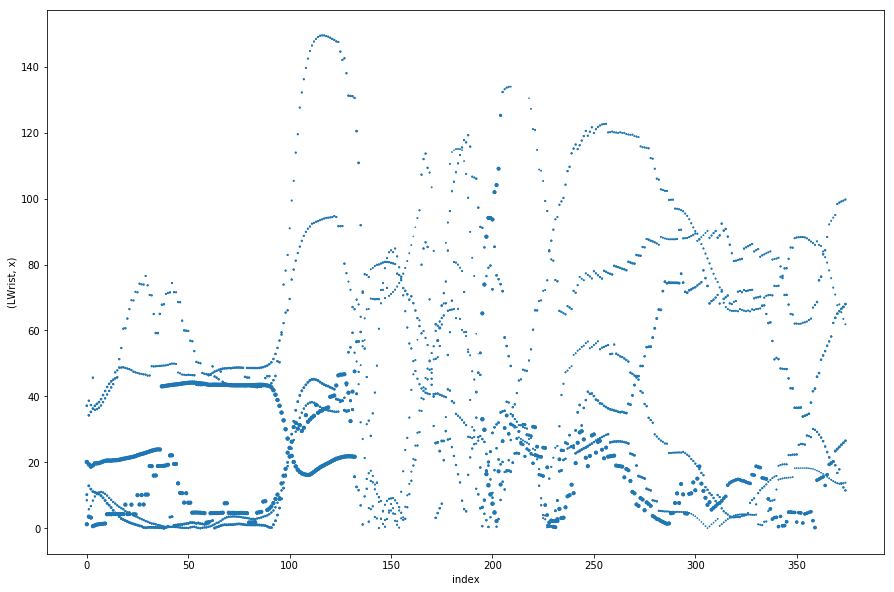

In [218]:
def plot_erreur_confiance(df_diff,op_data):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    columns=df_diff.columns.get_level_values('first')
    for seg in columns:
        alphas = op_data[(seg,'c')]
        rgba_colors = np.zeros((len(df_diff),4))
        # for red the first column needs to be one
        rgba_colors[:,2] = 1.0
        # the fourth column needs to be your alphas
        rgba_colors[:, 3] = alphas
        #x=df_diff[(seg,'x')].tolist()
        #y=df_diff[(seg,'y')].tolist()
        df_diff['index']=df_diff.index
        df_diff.plot.scatter(x='index',y=(seg,'x'),s=10*(1-alphas),ax=ax)
        df_diff.set_index('index',inplace=True,drop=True)
    plt.show()
    
plot_erreur_confiance(df_diff,op_data)
    

### Superposition animation 2D

<IPython.core.display.Javascript object>


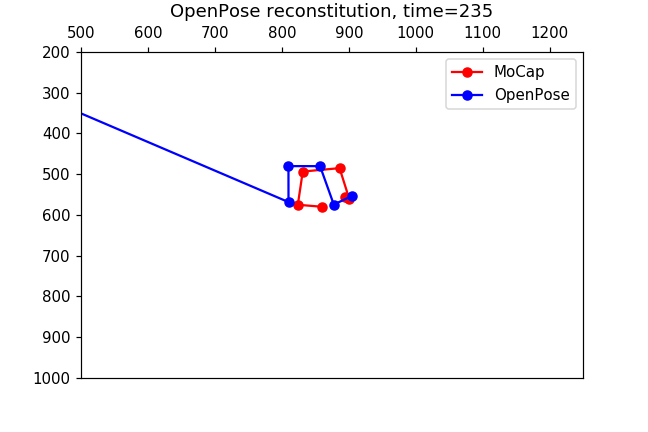

In [222]:
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt

segments1=['Nico1:abd2','Nico1:bd2','Nico1:epd1','Nico1:epd2','Nico1:abg1','Nico1:abg2']
segments2=["LWrist","LElbow",'LShoulder','RShoulder',"RElbow","RWrist"]

mocap_2D_anim=mocap_data_2D_sync.iloc[557::4].copy()
op_2D_anim=op_data_sync.iloc[172:].copy()

def update_graph_comparison(num):
    X_mc,Y_mc=[],[]
    X_op,Y_op=[],[]
    for seg in segments1:
        data=mocap_2D_anim[seg].iloc[num]
        X_mc.append(data.X)
        Y_mc.append(data.Y)

    for seg in segments2:
        data=op_2D_anim[seg].iloc[num]
        X_op.append(data.x)
        Y_op.append(data.y)
        
    graph1.set_data(X_mc, Y_mc)
    graph2.set_data(X_op, Y_op)
    title.set_text('OpenPose reconstitution, time={}'.format(num))
    return title, graph1, graph2 


fig = plt.figure()
ax = fig.add_subplot(111)
title = ax.set_title('Comparison OpenPose/Mocap 2D')

X_mc,Y_mc=[],[]
X_op,Y_op=[],[]
num=0

for seg in segments1:
    data=mocap_2D_anim[seg].iloc[num]
    X_mc.append(data.X)
    Y_mc.append(data.Y)
    
for seg in segments2:
    data=op_2D_anim[seg].iloc[num]
    X_op.append(data.x)
    Y_op.append(data.y)
graph1, = ax.plot(X_mc, Y_mc, linestyle="-", marker="o", color='r', label='MoCap')
graph2, = ax.plot(X_op, Y_op, linestyle="-", marker="o", color='b', label='OpenPose') 

ani = animation.FuncAnimation(fig, update_graph_comparison, frames=min(len(mocap_2D_anim),len(op_2D_anim)), 
                               interval=40, blit=True, repeat=False, save_count=min(len(mocap_2D_anim),len(op_2D_anim))) #save_count=len(op_data2)

ax.set_xlim(500,1250)
ax.set_ylim(200,1000)

#origine en haut à gauche de l'écran
ax.set_ylim(ax.get_ylim()[::-1])
ax.yaxis.tick_left()
ax.xaxis.tick_top() 
ax.legend()

### Si on veut enregistrer les animations ###
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=25, metadata=dict(artist='Me'), bitrate=1800)
#ani.save('videos/comparaison_op_mc_animation.mp4', writer=writer)
plt.show()

Animation mais en prenant en compte dataframe corrigé

<IPython.core.display.Javascript object>


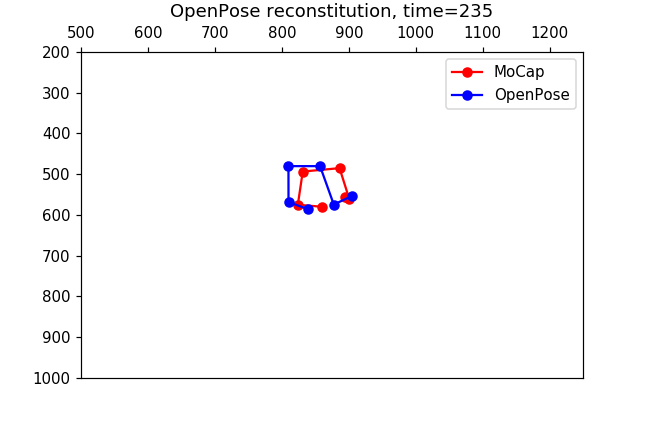

In [224]:
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt

segments1=['Nico1:abd2','Nico1:bd2','Nico1:epd1','Nico1:epd2','Nico1:abg1','Nico1:abg2']
segments2=["LWrist","LElbow",'LShoulder','RShoulder',"RElbow","RWrist"]

mocap_2D_anim=mocap_data_2D_sync.iloc[557::4].copy()
op_2D_anim=op_data_sync_holes_liss.iloc[172:].copy()

def update_graph_comparison(num):
    X_mc,Y_mc=[],[]
    X_op,Y_op=[],[]
    for seg in segments1:
        data=mocap_2D_anim[seg].iloc[num]
        X_mc.append(data.X)
        Y_mc.append(data.Y)

    for seg in segments2:
        data=op_2D_anim[seg].iloc[num]
        X_op.append(data.x)
        Y_op.append(data.y)
        
    graph1.set_data(X_mc, Y_mc)
    graph2.set_data(X_op, Y_op)
    title.set_text('OpenPose reconstitution, time={}'.format(num))
    return title, graph1, graph2 


fig = plt.figure()
ax = fig.add_subplot(111)
title = ax.set_title('Comparison OpenPose/Mocap 2D')

X_mc,Y_mc=[],[]
X_op,Y_op=[],[]
num=0

for seg in segments1:
    data=mocap_2D_anim[seg].iloc[num]
    X_mc.append(data.X)
    Y_mc.append(data.Y)
    
for seg in segments2:
    data=op_2D_anim[seg].iloc[num]
    X_op.append(data.x)
    Y_op.append(data.y)
graph1, = ax.plot(X_mc, Y_mc, linestyle="-", marker="o", color='r', label='MoCap')
graph2, = ax.plot(X_op, Y_op, linestyle="-", marker="o", color='b', label='OpenPose') 

ani = animation.FuncAnimation(fig, update_graph_comparison, frames=min(len(mocap_2D_anim),len(op_2D_anim)), 
                               interval=40, blit=True, repeat=False, save_count=min(len(mocap_2D_anim),len(op_2D_anim))) #save_count=len(op_data2)

ax.set_xlim(500,1250)
ax.set_ylim(200,1000)

#origine en haut à gauche de l'écran
ax.set_ylim(ax.get_ylim()[::-1])
ax.yaxis.tick_left()
ax.xaxis.tick_top() 
ax.legend()

### Si on veut enregistrer les animations ###
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=25, metadata=dict(artist='Me'), bitrate=1800)
#ani.save('videos/comparaison_op_mc_animation.mp4', writer=writer)
plt.show()

## Vitesses

## Accélérations